In [1]:
import time
import numpy as np
from plot_setup import *
import sounddevice as sd
import matplotlib.pylab as plt
from IPython.display import HTML
from matplotlib import animation
from continuously_signal import *

define_plots_settings()
%matplotlib inline

# Aquisição do sinal - Entrada

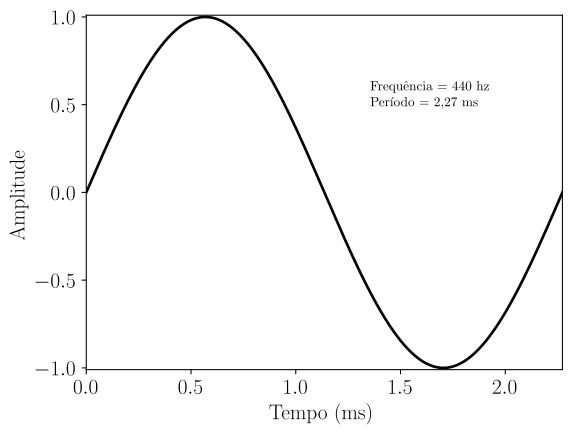

### Simulação do sinal contínuo
    cont_signal_freq - Frequência do sinal 
    time_sampling - Periodo em que o sinal foi amostrado
    cont_sampling_freq - Frequência do sinal amostrado

Text(0, 0.5, 'Amplitude')

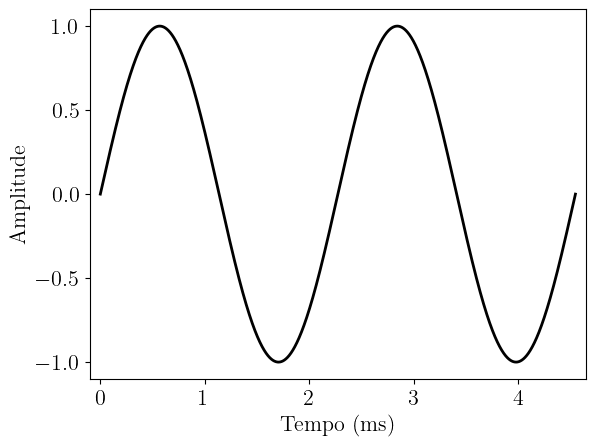

In [14]:
cont_signal_freq = [440]
time_sampling =1/440 *2
cont_sampling_freq = 88000000 #88 Mhz
t_cont, signal_cont = signal_simulation(cont_signal_freq, cont_sampling_freq, time_sampling)
plt.plot(t_cont*1000, signal_cont,'k')
plt.xlabel("Tempo (ms)")
plt.axis([-0.1, t_cont.max()*1000+0.1, -1.1, 1.1])
plt.ylabel("Amplitude")

## Teorema de Shannon-Nyquist
A frequência de amostragem deve ser, no mínimo, maior que duas vezes a maior frequência do sinal de interesse

### Sinal Amostrado
    fc - Frequência da senóide
    sampling_freq - Frequência de amostragem
    time_sampling - Periodo em que o sinal foi amostrado


In [18]:
t_samp

array([0.        , 0.00113636])

In [35]:
fc = [440]
sampling_freq = [880]
time_sampling = 1/fc[0] *2

Text(0, 0.5, 'Amplitude')

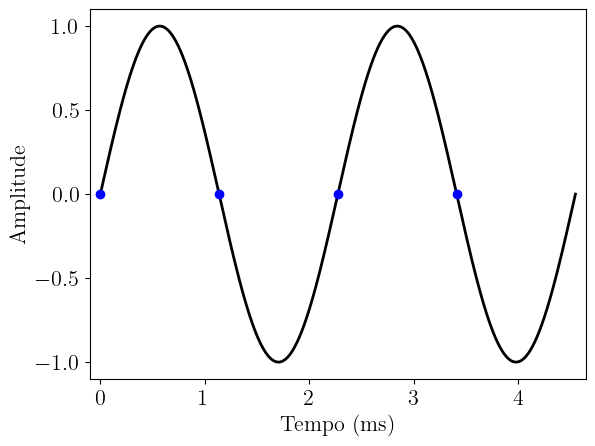

In [52]:
phase = 0
#phase = np.pi/2
t_cont, signal_cont = signal_simulation(cont_signal_freq, cont_sampling_freq, time_sampling, phase)
t_samp, signal_samp = signal_simulation(fc, sampling_freq[0], time_sampling, phase )
plt.plot(t_cont*1000, signal_cont,'k')
plt.plot(t_samp*1000, signal_samp,'ob')
plt.xlabel("Tempo (ms)")
plt.axis([-0.1, (t_cont.max())*1000+0.1, -1.1, 1.1])
plt.ylabel("Amplitude")

## Mudança na frequência de amostragem

In [53]:
def animate(fs):
    t_samp, signal_samp = signal_simulation(fc, fs, time_sampling)
    line1.set_data(t_samp*1000,signal_samp)
    return line1
def set_plot():
    f, axarr = plt.subplots(1,2,  sharey = True, figsize=(10,7),animated=True)
    line0, = axarr[0].plot([],[],'k')
    line1, = axarr[1].plot([],[],'ob')
    axarr[0].title.set_text("Sinal Contínuo")
    axarr[0].set_xlabel("Tempo (ms)")
    axarr[0].set_ylabel("Amplitude")
    axarr[0].set_xlim((0,2.3))
    axarr[0].set_ylim((-1.01,1.01))
    axarr[1].set_xlim((0,2.3))
    axarr[1].set_ylim((-1.01,1.01))
    axarr[1].title.set_text("Sinal Discreto")
    axarr[1].set_xlabel("Tempo (ms)")
    line0.set_data(t_cont*1000, signal_cont)
    return line0,line1,f

In [54]:
sampling_freq = np.arange(880,10000,100)
line0, line1, f = set_plot()
plt.close()
ani = matplotlib.animation.FuncAnimation(f, animate, frames=sampling_freq)
HTML(ani.to_jshtml())

## Frequência de amostragem fixa
    fs = 1000 Hz
    fc = 440 Hz

(0.0, 20.0, -1.01, 1.01)

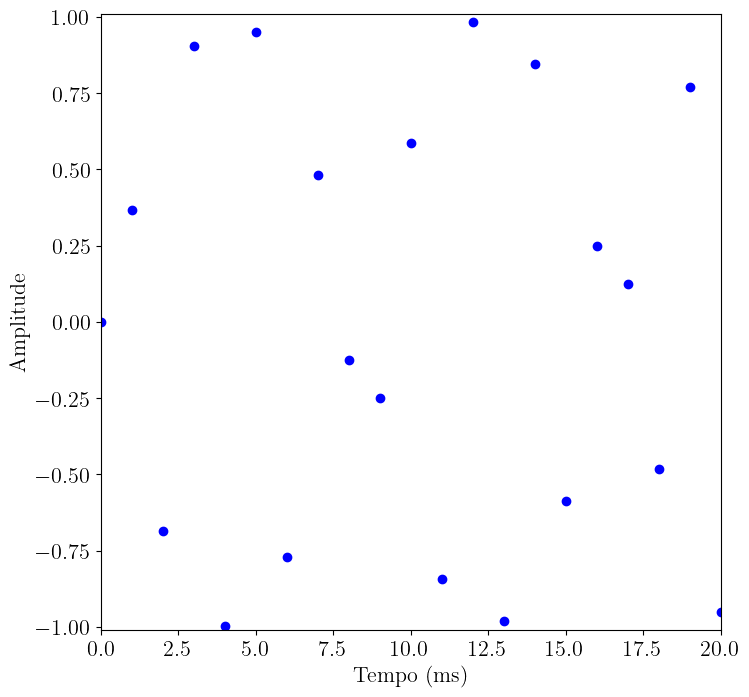

In [58]:
sampling_freq = 1000
fc = [440]
time_sampling = 1/fc[0]*10
t_samp, signal_samp = signal_simulation(fc, sampling_freq, time_sampling, phase = 0)
t_cont, signal_cont = signal_simulation(cont_signal_freq, cont_sampling_freq, time_sampling, phase = 0)
plt.figure(figsize = [8,8])
plt.plot(t_samp*1000, signal_samp,'ob')
#plt.plot(t_cont*1000,signal_cont,'k')
plt.ylabel("Amplitude")
plt.xlabel("Tempo (ms)")
plt.axis([0,20,-1.01,1.01])

O sinal está irreconhecível, baixa resolução

## Simulando Digital to Analog Converter


In [59]:
def D2A(signal_samp):
    signal_reconstructed = np.ones(100*signal_samp.size)
    for aux1 in range (0,signal_samp.size):
        signal_reconstructed[aux1*100:(aux1+1)*100] *= signal_samp[aux1]
    return signal_reconstructed


Text(0, 0.5, 'Amplitude')

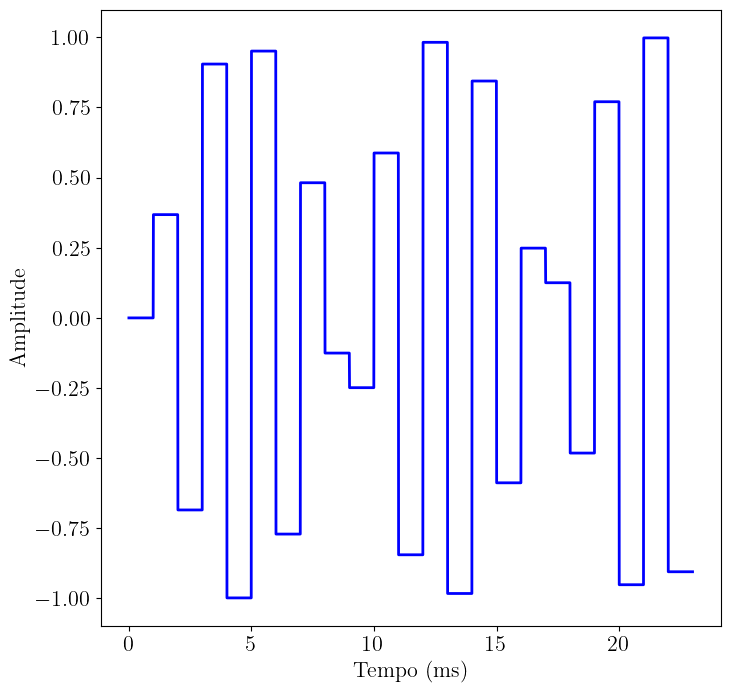

In [63]:
signal_reconstructed = D2A(signal_samp)
fs_cont_da = sampling_freq*100
n_da = np.arange(0,signal_reconstructed.size)
t_cont_da = n_da/fs_cont_da
plt.figure(figsize = (8,8))
plt.plot(t_cont_da*1000, signal_reconstructed,'b')
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude")
#plt.axis([0,20,-1.01,1.01])

# Desenvolvendo o filtro digital passa baixas